<table>
  <tr>
    <td style="text-align: center;">
      <img src="https://www.ufpi.br/images/ufpi-icone1.png" alt="UFPI Logo" style="width: 100px; height: auto;">
    </td>
    <td style="text-align: left;">
      <h3>Universidade Federal do Piauí - UFPI</h3>
      <h3>Departamento de Computação/CNN</h3>
      <h3>Trabalho da Disciplina de Aprendizado de Máquina</h3>
      <h3>Professor: Vinicius Ponte Machado</h3>
    </td>
  </tr>
</table>

**Alunos**: Marcelo Pontes e Marcelo Rego  
**Objetivo**: realizar estudos de Redes Neurais utilizando o banco de dados de vidros  
**Repositório**: [Glass Identification)](https://archive.ics.uci.edu/dataset/42/glass+identification)

# **Introdução**

<p style='text-align: justify;'>
O propósito da pesquisa foi ...
</p>

# **Metodologia**
<p style='text-align: justify;'>
O estudo foi conduzido de forma abrangente, revisitando cada etapa várias vezes para avaliar, ajustar e validar as hipóteses propostas.
</p>

## Importar as bibliotecas

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import sklearn.metrics as mt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

## Defir a qualidade das imagens

In [124]:
dpi = 150

## Baixar o arquivo 'glass.data' diretamente no Colab

In [ ]:
#Carregar o Dataset Glass
# URL do dataset Glass
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Definir os nomes das colunas
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Tipo"]

# Carregar o dataset
glass_data = pd.read_csv(url, header=None, names=columns)

# Remover a coluna 'Id' (não é relevante para o modelo)
glass_data = glass_data.drop("Id", axis=1)

In [ ]:
# Verificar os primeiros dados
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Hipótese 1: todos os dados e normalizado para 0 e 1

### Pré-processamento

In [23]:
#Pré-processamento
# Separar features e target
X = glass_data.drop("Tipo", axis=1)
y = glass_data["Tipo"]

# Codificando as classes em valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Normalizar as features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Modelo POLY

In [32]:
# Criar o modelo SVM com kernel
svm_model_poly = SVC(kernel='poly', C=100, class_weight='balanced', degree=3, gamma='scale', random_state=42)
# Treinar o modelo
svm_model_poly.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', kernel='poly', random_state=42)

In [33]:
# Fazer previsões no conjunto de teste
y_pred = svm_model_poly.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.7619    0.7619    0.7619        21
           1     0.7600    0.8261    0.7917        23
           2     0.5000    0.4000    0.4444         5
           3     1.0000    0.7500    0.8571         4
           4     0.7500    1.0000    0.8571         3
           5     1.0000    0.8889    0.9412         9

    accuracy                         0.7846        65
   macro avg     0.7953    0.7711    0.7756        65
weighted avg     0.7882    0.7846    0.7831        65



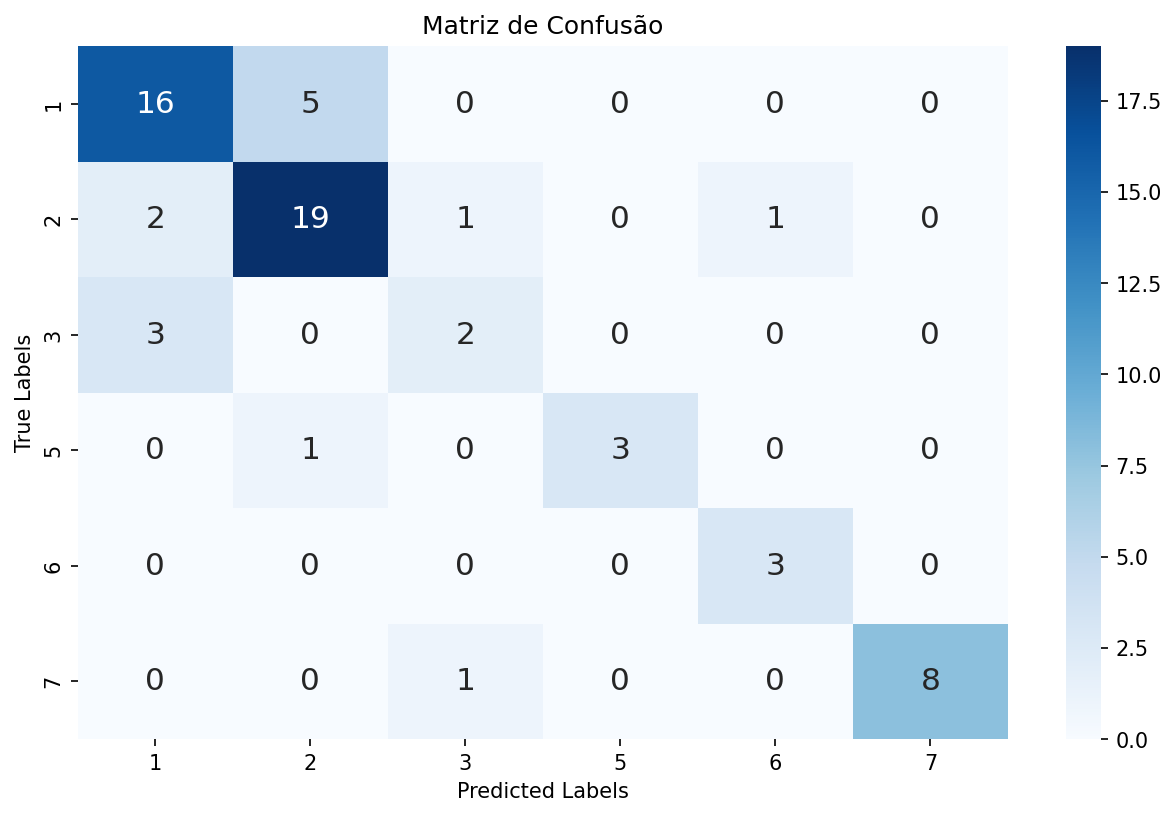

In [34]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

### Modelo RBF

In [35]:
# Modelo RBF
svm_model_rbf = SVC(kernel='rbf', C=100, class_weight='balanced', gamma='scale', random_state=42)
# Treinar o modelo
svm_model_rbf.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', random_state=42)

In [36]:
#Avaliar o Modelo
# Fazer previsões no conjunto de teste
y_pred = svm_model_rbf.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.7308    0.9048    0.8085        21
           1     0.7391    0.7391    0.7391        23
           2     1.0000    0.4000    0.5714         5
           3     1.0000    0.5000    0.6667         4
           4     0.7500    1.0000    0.8571         3
           5     1.0000    0.8889    0.9412         9

    accuracy                         0.7846        65
   macro avg     0.8700    0.7388    0.7640        65
weighted avg     0.8092    0.7846    0.7776        65



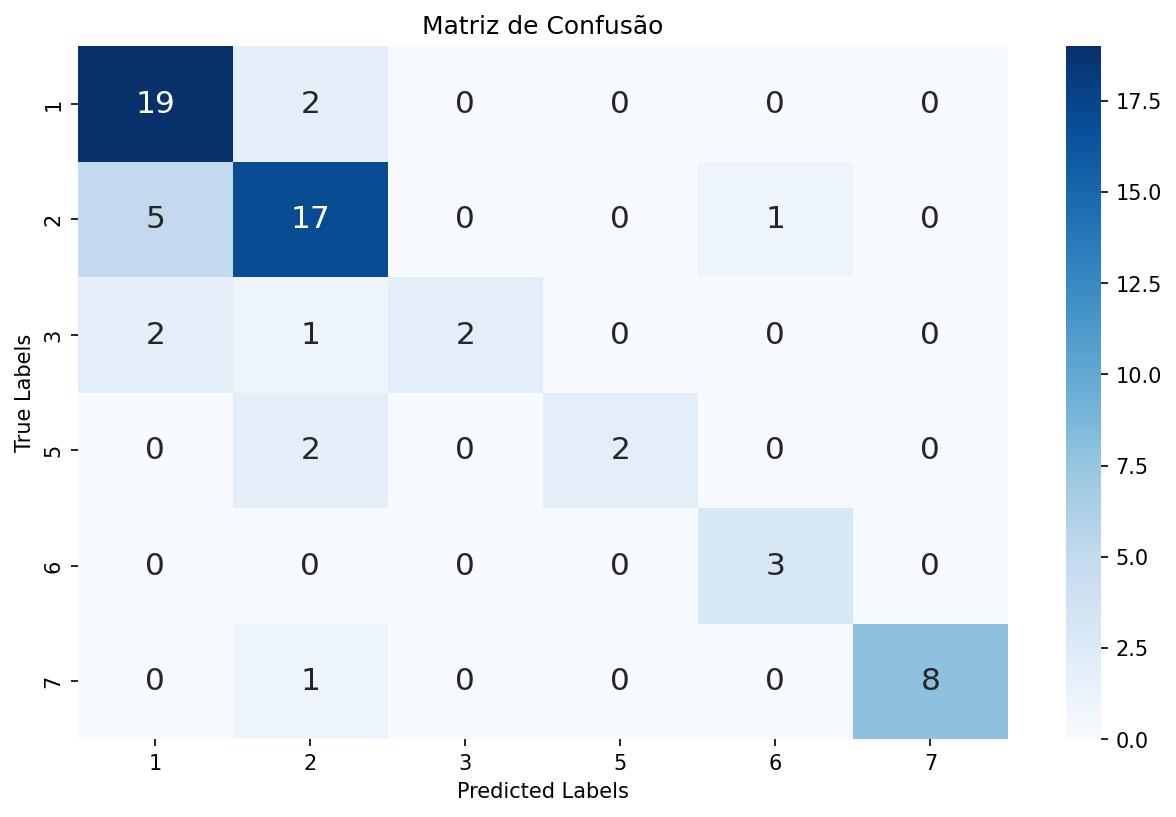

In [37]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

## Hipótese 2: todos os dados, mas sem normalização

### Pré-processamento

In [72]:
#Carregar o Dataset Glass
# URL do dataset Glass
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Definir os nomes das colunas
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Tipo"]

# Carregar o dataset
glass_data = pd.read_csv(url, header=None, names=columns)

# Remover a coluna 'Id' (não é relevante para o modelo)
glass_data = glass_data.drop("Id", axis=1)

#Pré-processamento
# Separar features e target
X = glass_data.drop("Tipo", axis=1)
y = glass_data["Tipo"]

# Codificando as classes em valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Modelo POLY

In [73]:
# Criar o modelo SVM com kernel
svm_model_poly = SVC(kernel='poly', C=100, class_weight='balanced', degree=3, gamma='scale', random_state=42)
# Treinar o modelo
svm_model_poly.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', kernel='poly', random_state=42)

In [74]:
# Fazer previsões no conjunto de teste
y_pred = svm_model_poly.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.5385    0.6667    0.5957        21
           1     1.0000    0.0435    0.0833        23
           2     0.1111    0.4000    0.1739         5
           3     0.5714    1.0000    0.7273         4
           4     0.6667    0.6667    0.6667         3
           5     0.9000    1.0000    0.9474         9

    accuracy                         0.4923        65
   macro avg     0.6313    0.6295    0.5324        65
weighted avg     0.7269    0.4923    0.4420        65



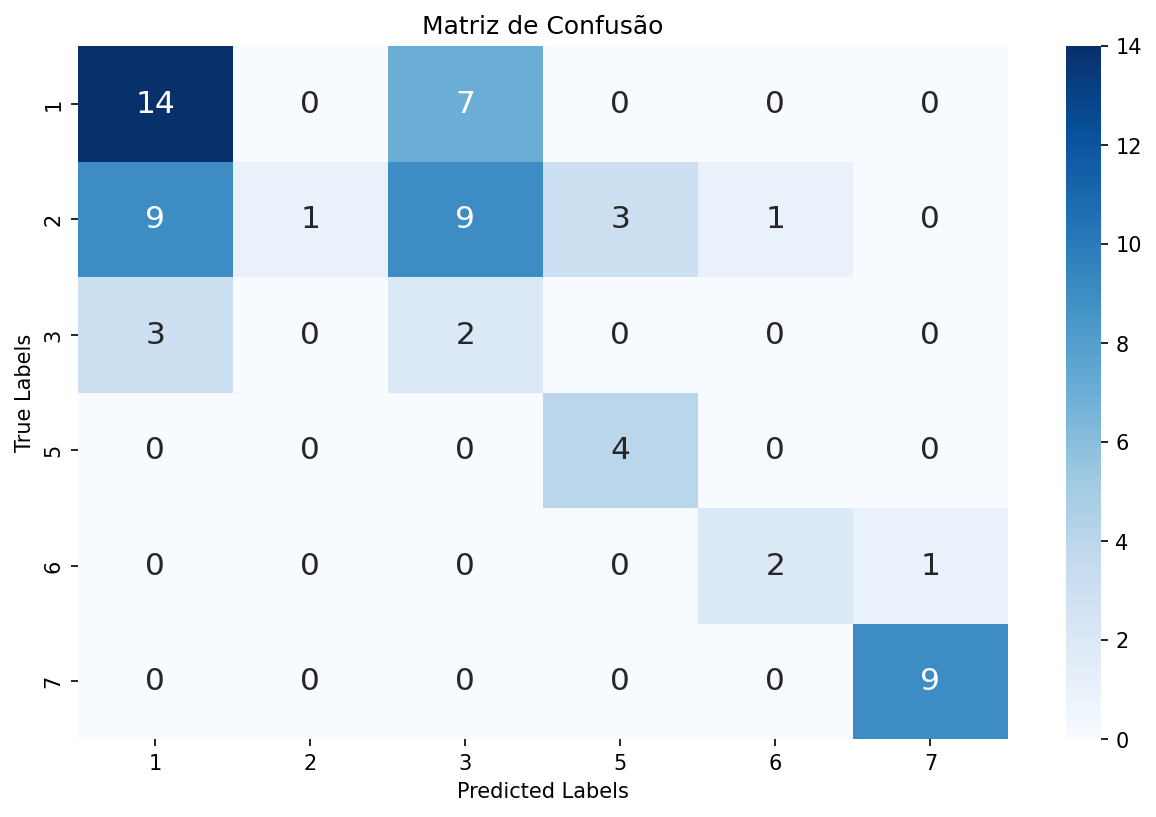

In [75]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

### Modelo RBF

In [82]:
# Modelo RBF
svm_model_rbf = SVC(kernel='rbf', C=100, class_weight='balanced', gamma=2, random_state=42)
# Treinar o modelo
svm_model_rbf.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', gamma=2, random_state=42)

In [83]:
#Avaliar o Modelo
# Fazer previsões no conjunto de teste
y_pred = svm_model_rbf.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.7778    0.6667    0.7179        21
           1     0.7241    0.9130    0.8077        23
           2     0.2000    0.2000    0.2000         5
           3     1.0000    0.5000    0.6667         4
           4     1.0000    0.6667    0.8000         3
           5     0.8889    0.8889    0.8889         9

    accuracy                         0.7385        65
   macro avg     0.7651    0.6392    0.6802        65
weighted avg     0.7537    0.7385    0.7342        65



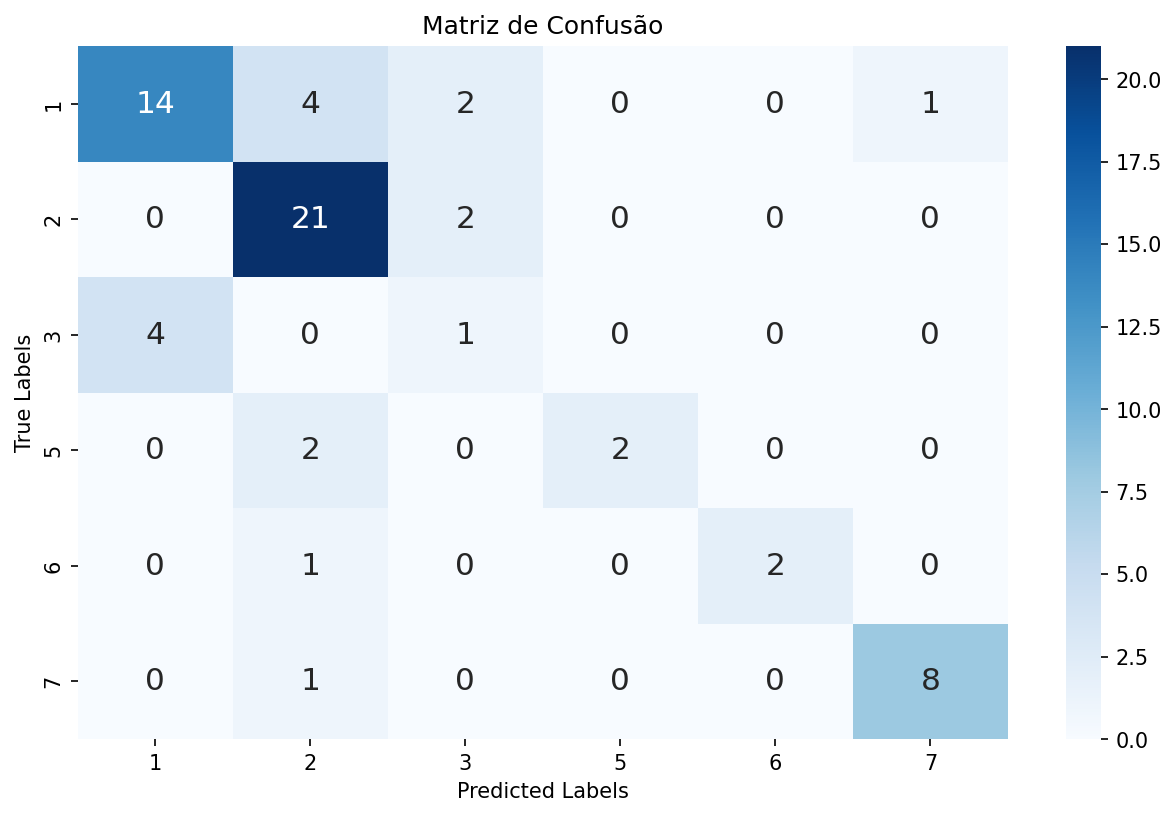

In [84]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

## Hipótese 3: Agrupado em  3 classes

### Pré-processamento

In [90]:
#Carregar o Dataset Glass
# URL do dataset Glass
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Definir os nomes das colunas
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Tipo"]

# Carregar o dataset
glass_data = pd.read_csv(url, header=None, names=columns)

# Remover a coluna 'Id' (não é relevante para o modelo)
glass_data = glass_data.drop("Id", axis=1)


# Mapeando as classes
glass_data['Tipo'] = glass_data['Tipo'].map({
    1: '1 - Vidro Flutuado',
    2: '2 - Vidro Não Flutuado',
    3: 'Outros', 4: 'Outros', 5: 'Outros', 6: 'Outros', 7: 'Outros'
})

#Pré-processamento
# Separar features e target
X = glass_data.drop(["Tipo", "Ca"], axis=1)
y = glass_data["Tipo"]

# Codificando as classes em valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Normalizar as features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [91]:
# Quantitativo e porcentagens de cada classe
quantitativo_classes = glass_data['Tipo'].value_counts()
porcentagens_classes = glass_data['Tipo'].value_counts(normalize=True) * 100

print("Quantitativo de cada classe:")
print(quantitativo_classes)

print("\nPorcentagem de cada classe:")
print(porcentagens_classes)

Quantitativo de cada classe:
Tipo
2 - Vidro Não Flutuado    76
1 - Vidro Flutuado        70
Outros                    68
Name: count, dtype: int64

Porcentagem de cada classe:
Tipo
2 - Vidro Não Flutuado    35.514019
1 - Vidro Flutuado        32.710280
Outros                    31.775701
Name: proportion, dtype: float64


### Modelo POLY

In [94]:
# Criar o modelo SVM com kernel
svm_model_poly = SVC(kernel='poly', C=100, class_weight='balanced', degree=4, gamma=4, random_state=42)
# Treinar o modelo
svm_model_poly.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', degree=4, gamma=4, kernel='poly',
    random_state=42)

In [95]:
# Fazer previsões no conjunto de teste
y_pred = svm_model_poly.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.7500    0.8571    0.8000        21
           1     0.7083    0.7391    0.7234        23
           2     0.7647    0.6190    0.6842        21

    accuracy                         0.7385        65
   macro avg     0.7410    0.7384    0.7359        65
weighted avg     0.7400    0.7385    0.7355        65



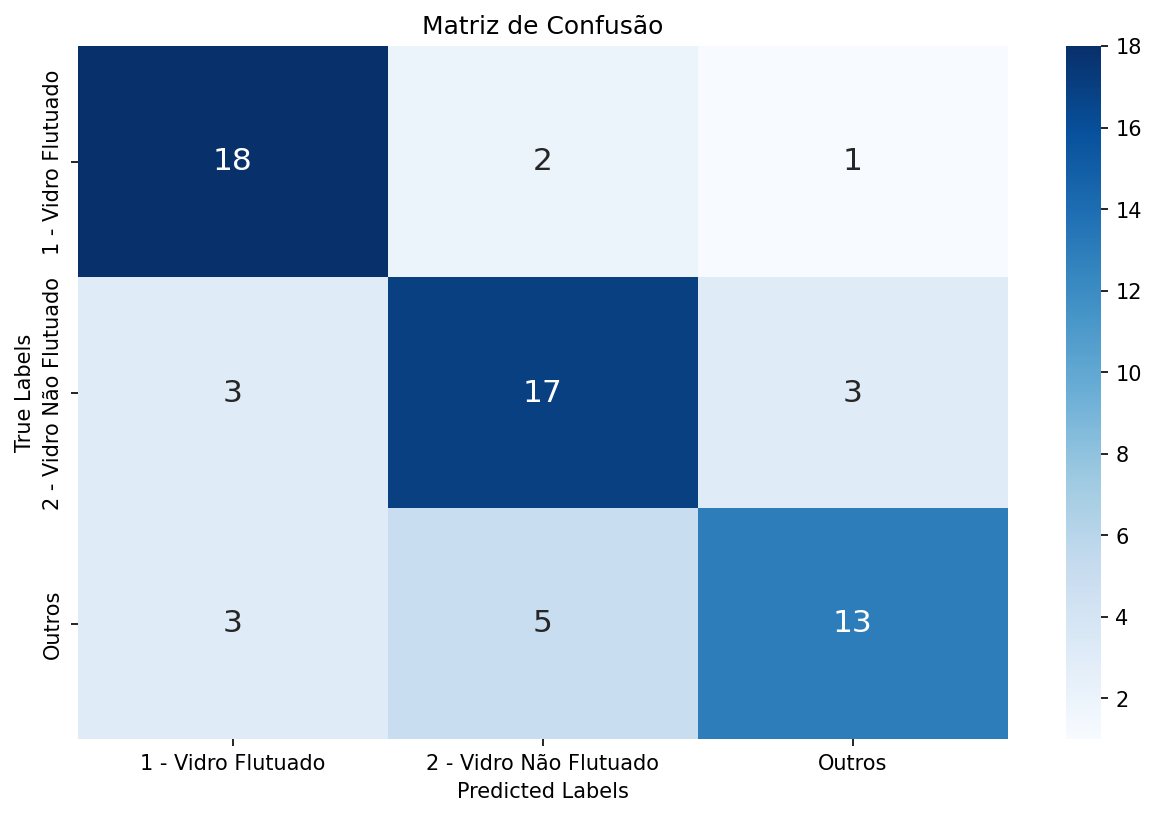

In [96]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

### Modelo RBF

In [98]:
# Modelo RBF
svm_model_rbf = SVC(kernel='rbf', C=100, class_weight='balanced', gamma=3, random_state=42)
# Treinar o modelo
svm_model_rbf.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', gamma=3, random_state=42)

In [99]:
#Avaliar o Modelo
# Fazer previsões no conjunto de teste
y_pred = svm_model_rbf.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.7391    0.8095    0.7727        21
           1     0.6800    0.7391    0.7083        23
           2     0.8235    0.6667    0.7368        21

    accuracy                         0.7385        65
   macro avg     0.7476    0.7384    0.7393        65
weighted avg     0.7455    0.7385    0.7383        65



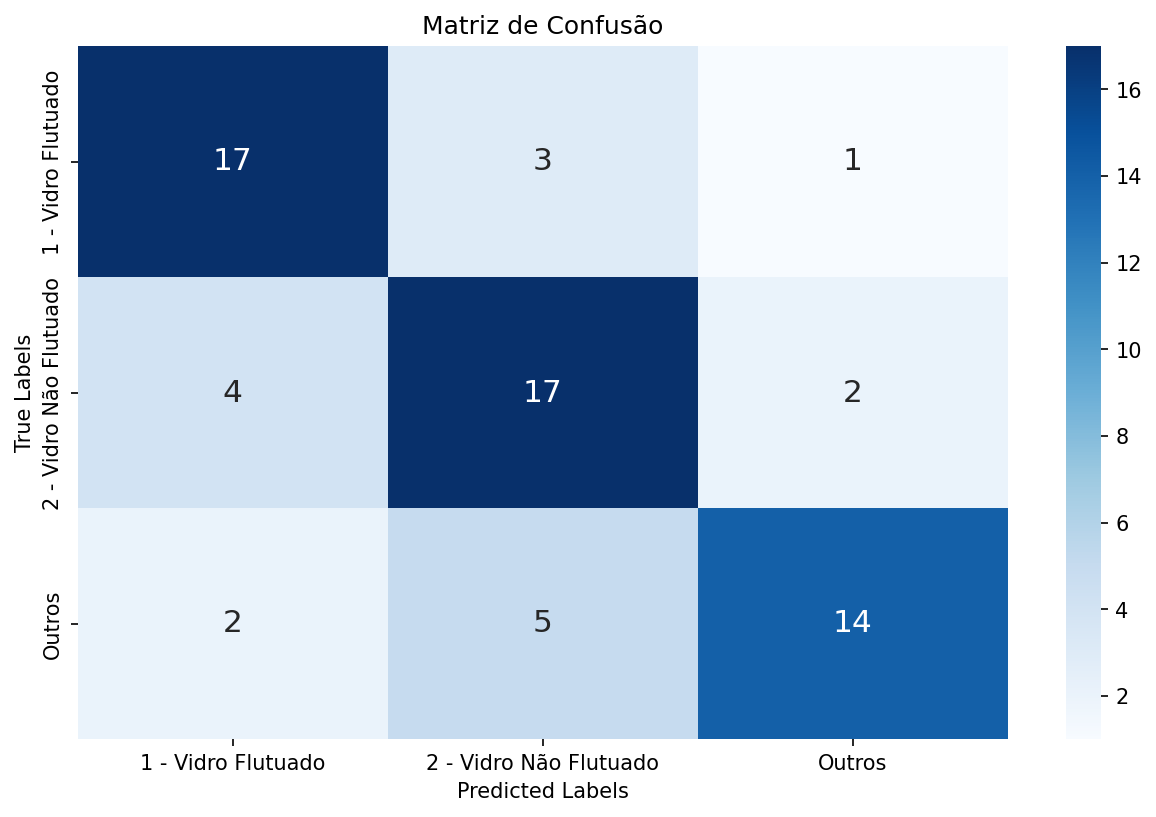

In [100]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

## Hipótese 4: todos as features, normalizado e com a 2 Classes

### Pré-processamento

In [101]:
#Carregar o Dataset Glass
# URL do dataset Glass
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Definir os nomes das colunas
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Tipo"]

# Carregar o dataset
glass_data = pd.read_csv(url, header=None, names=columns)

# Remover a coluna 'Id' (não é relevante para o modelo)
glass_data = glass_data.drop("Id", axis=1)

# Mapeando as classes
glass_data['Tipo'] = glass_data['Tipo'].map({
    1: '1 - Vidro Flutuado',
    2: '2 - Vidro Não Flutuado',
    3: 'Outros', 4: 'Outros', 5: 'Outros', 6: 'Outros', 7: 'Outros'
})

# Removendo os registros com "Outros"
glass_data = glass_data[glass_data['Tipo'] != 'Outros']

#Pré-processamento
# Separar features e target
X = glass_data.drop("Tipo", axis=1)
y = glass_data["Tipo"]

# Codificando as classes em valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Normalizar as features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [102]:
# Quantitativo e porcentagens de cada classe
quantitativo_classes = glass_data['Tipo'].value_counts()
porcentagens_classes = glass_data['Tipo'].value_counts(normalize=True) * 100

print("Quantitativo de cada classe:")
print(quantitativo_classes)

print("\nPorcentagem de cada classe:")
print(porcentagens_classes)

Quantitativo de cada classe:
Tipo
2 - Vidro Não Flutuado    76
1 - Vidro Flutuado        70
Name: count, dtype: int64

Porcentagem de cada classe:
Tipo
2 - Vidro Não Flutuado    52.054795
1 - Vidro Flutuado        47.945205
Name: proportion, dtype: float64


### Modelo POLY

In [110]:
# Criar o modelo SVM com kernel
svm_model_poly = SVC(kernel='poly', C=40, class_weight='balanced', degree=3, gamma='scale', random_state=42, probability=True)
# Treinar o modelo
svm_model_poly.fit(X_train, y_train)

SVC(C=40, class_weight='balanced', kernel='poly', probability=True,
    random_state=42)

In [111]:
# Fazer previsões no conjunto de teste
y_pred = svm_model_poly.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.9000    0.8571    0.8780        21
           1     0.8750    0.9130    0.8936        23

    accuracy                         0.8864        44
   macro avg     0.8875    0.8851    0.8858        44
weighted avg     0.8869    0.8864    0.8862        44



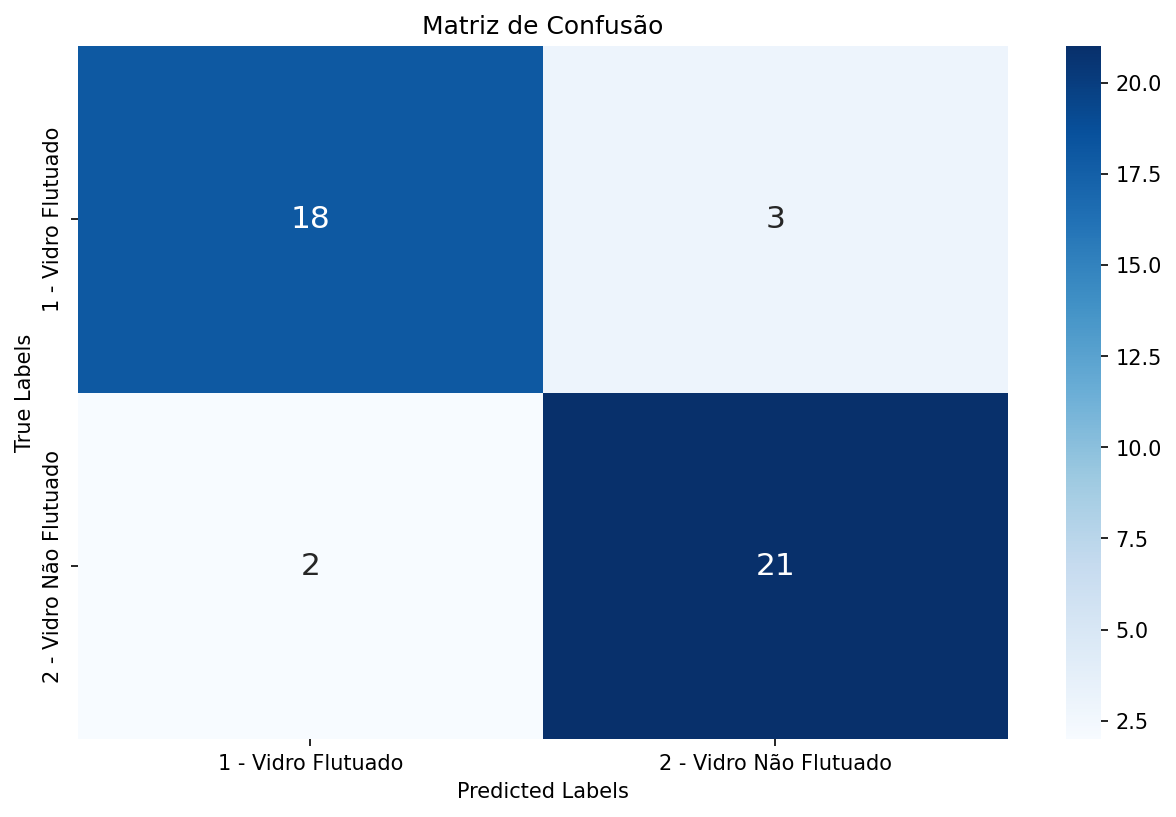

In [112]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

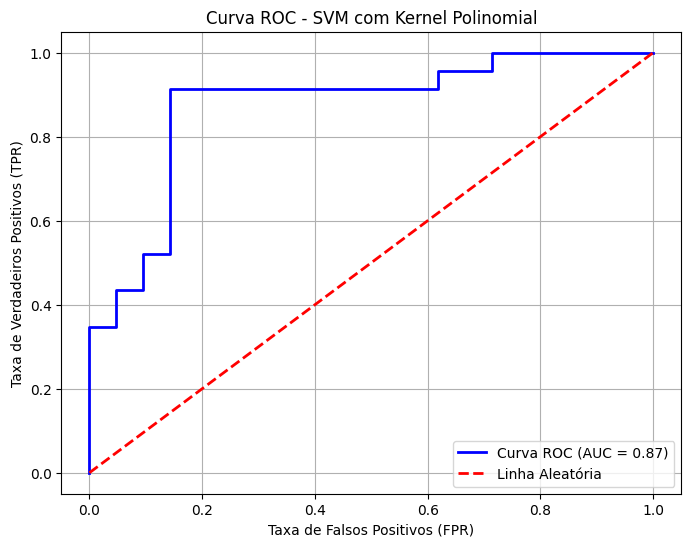

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular as probabilidades
y_prob_poly = svm_model_poly.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_poly)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Linha Aleatória')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - SVM com Kernel Polinomial')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [121]:
print("Classes únicas no conjunto de treino:", np.unique(y_train))
print("Classes únicas no conjunto de teste:", np.unique(y_test))

Classes únicas no conjunto de treino: [0 1]
Classes únicas no conjunto de teste: [0 1]


### Modelo RBF

In [106]:
# Modelo RBF
svm_model_rbf = SVC(kernel='rbf', C=50, class_weight='balanced', gamma=3, random_state=42)
# Treinar o modelo
svm_model_rbf.fit(X_train, y_train)

SVC(C=50, class_weight='balanced', gamma=3, random_state=42)

In [107]:
#Avaliar o Modelo
# Fazer previsões no conjunto de teste
y_pred = svm_model_rbf.predict(X_test)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.8500    0.8095    0.8293        21
           1     0.8333    0.8696    0.8511        23

    accuracy                         0.8409        44
   macro avg     0.8417    0.8395    0.8402        44
weighted avg     0.8413    0.8409    0.8407        44



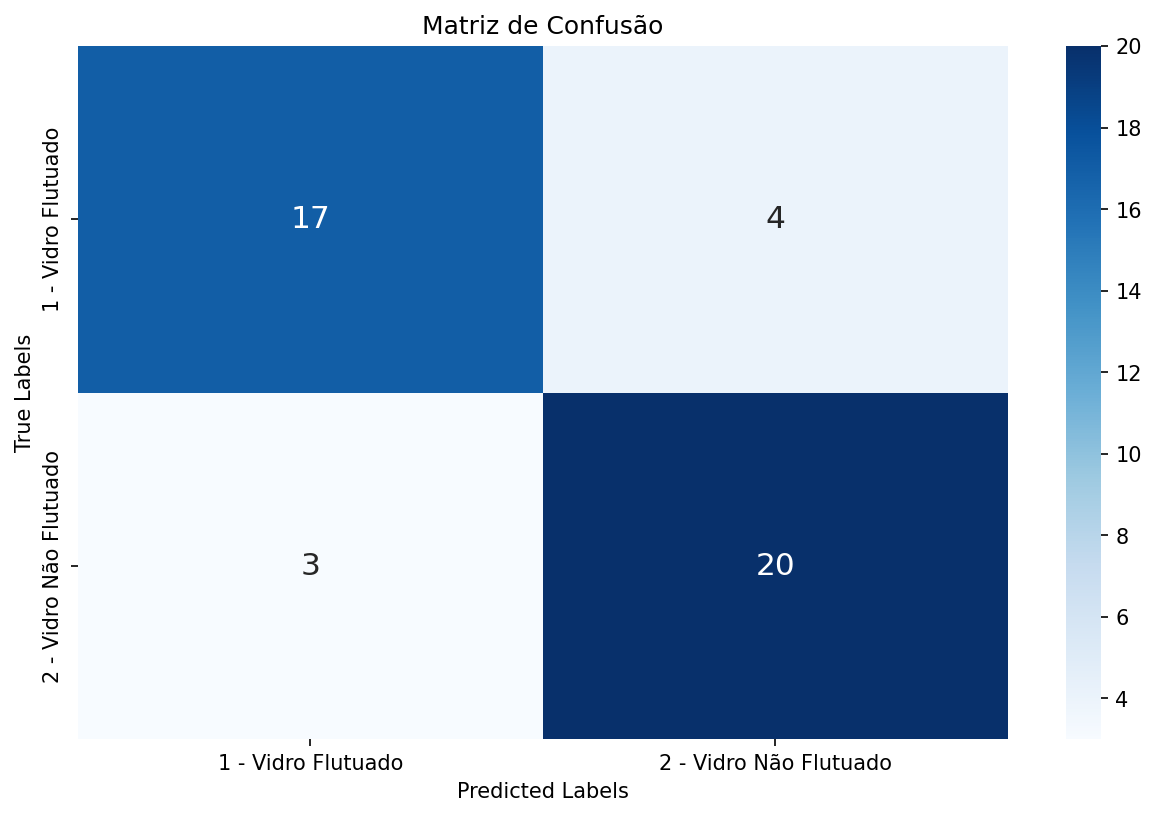

In [108]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

## Hipótese 5: utillizando PCA

### Importar as bibliotecas necessárias

In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Carregar o dataset

In [39]:
# URL do dataset Glass
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Definir os nomes das colunas
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Tipo"]

# Carregar o dataset
glass_data = pd.read_csv(url, header=None, names=columns)

# Remover a coluna 'Id' (não é relevante para o modelo)
glass_data = glass_data.drop("Id", axis=1)

### Separar features e rótulos

In [40]:
X = glass_data.drop("Tipo", axis=1)
y = glass_data["Tipo"]

### Normalizar as features

In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Aplicar PCA

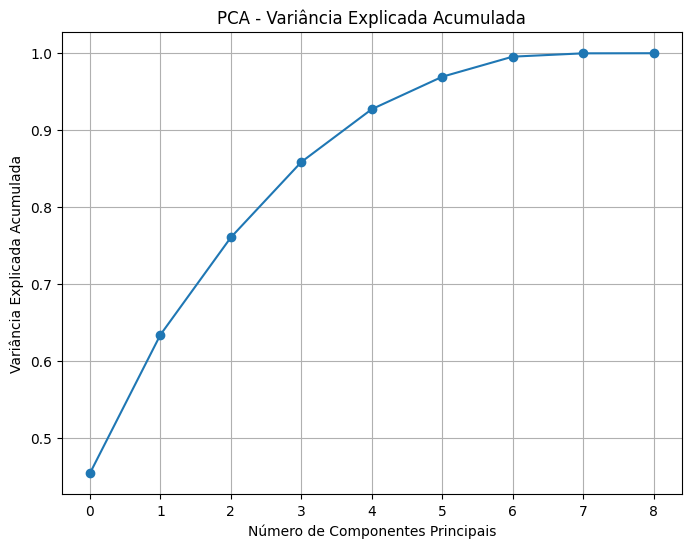

In [42]:
# Inicializando o PCA sem especificar o número de componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variância explicada por componente
explained_variance_ratio = pca.explained_variance_ratio_

# Plotar a variância explicada cumulativa
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada Acumulada')
plt.grid()
plt.show()

### Interpretar os resultados

*   **Determine o número de componentes necessários**: Observe no gráfico o número de componentes principais que explicam pelo menos 95% da variância acumulada.
*   Se poucos componentes (por exemplo, ≤3) explicarem a maior parte da variância, o PCA pode ser útil para reduzir a dimensionalidade.

### Treinar o modelo SVM com e sem PCA

### Importar as bibliotecas necessárias para SVM

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Dividir os dados em treino e teste

In [67]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

### Treinar o modelo SVM sem PCA

In [68]:
# Inicializar o modelo SVM
svm_no_pca = SVC(kernel='rbf', C=100, gamma='scale', class_weight='balanced', random_state=42)

# Treinar o modelo
svm_no_pca.fit(X_train, y_train)

# Fazer previsões
y_pred_no_pca = svm_no_pca.predict(X_test)

# Avaliar o modelo
print("Desempenho do SVM sem PCA:")
print("Acurácia:", accuracy_score(y_test, y_pred_no_pca))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_no_pca, digits=4))

Desempenho do SVM sem PCA:
Acurácia: 0.7846153846153846

Relatório de Classificação:
               precision    recall  f1-score   support

           1     0.7308    0.9048    0.8085        21
           2     0.7391    0.7391    0.7391        23
           3     1.0000    0.4000    0.5714         5
           5     1.0000    0.5000    0.6667         4
           6     0.7500    1.0000    0.8571         3
           7     1.0000    0.8889    0.9412         9

    accuracy                         0.7846        65
   macro avg     0.8700    0.7388    0.7640        65
weighted avg     0.8092    0.7846    0.7776        65



### Aplicar PCA e reduzir a dimensionalidade

In [69]:
# Reduzir dimensionalidade com PCA
n_components = 6  # Ajuste conforme o gráfico de variância
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Treinar o modelo SVM com PCA

In [70]:
# Inicializar o modelo SVM
svm_with_pca = SVC(kernel='rbf', C=100, gamma='scale', class_weight='balanced', random_state=42)

# Treinar o modelo
svm_with_pca.fit(X_train_pca, y_train)

# Fazer previsões
y_pred_with_pca = svm_with_pca.predict(X_test_pca)

# Avaliar o modelo
print("\nDesempenho do SVM com PCA:")
print("Acurácia:", accuracy_score(y_test, y_pred_with_pca))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_with_pca, digits=4))


Desempenho do SVM com PCA:
Acurácia: 0.7076923076923077

Relatório de Classificação:
               precision    recall  f1-score   support

           1     0.6500    0.6190    0.6341        21
           2     0.7826    0.7826    0.7826        23
           3     0.1667    0.2000    0.1818         5
           5     1.0000    1.0000    1.0000         4
           6     0.6667    0.6667    0.6667         3
           7     0.8889    0.8889    0.8889         9

    accuracy                         0.7077        65
   macro avg     0.6925    0.6929    0.6924        65
weighted avg     0.7151    0.7077    0.7112        65



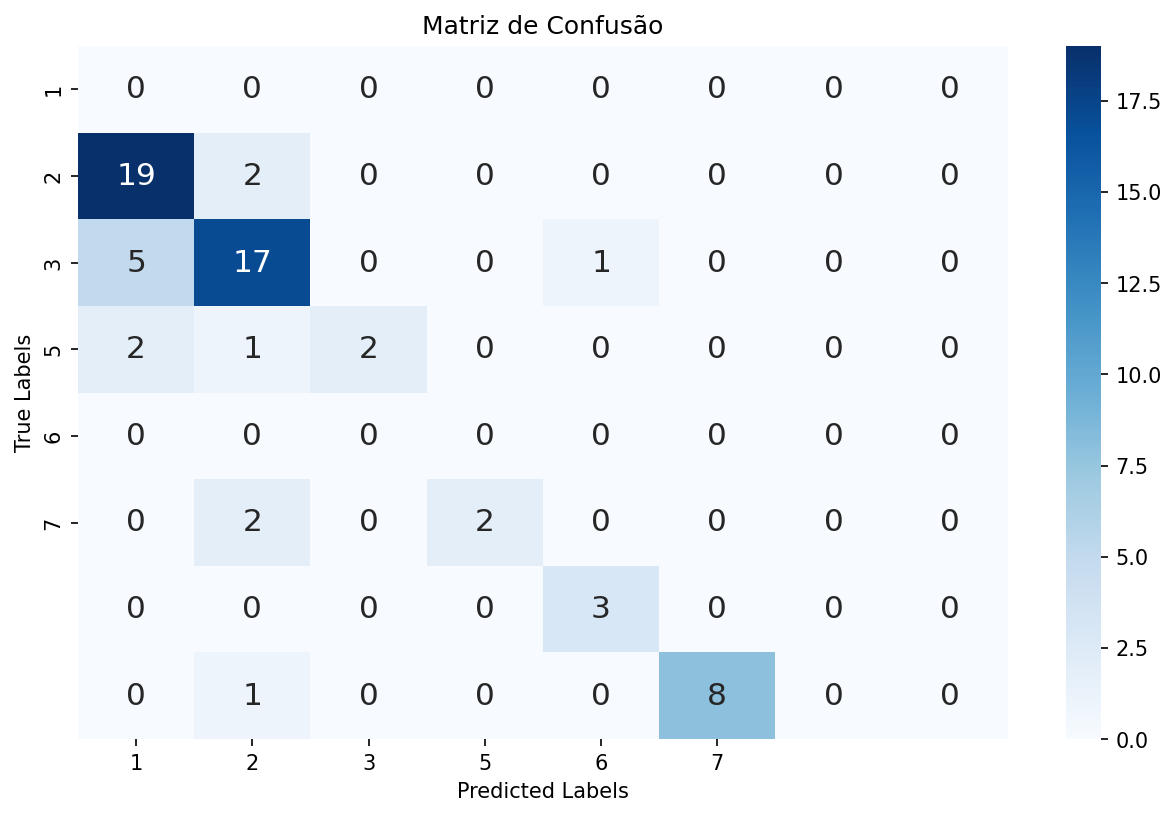

In [71]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    annot_kws={"size":15}
    )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

In [ ]:

# Mapeando as classes
glass_data['Tipo'] = glass_data['Class'].map({
    1: '1 - Vidro Flutuado',
    2: '2 - Vidro Não Flutuado',
    3: 'Outros', 4: 'Outros', 5: 'Outros', 6: 'Outros', 7: 'Outros'
})


# Removendo os registros com "Outros"
#glass_data = glass_data[glass_data['Tipo'] != 'Outros']

# Remover a coluna "Class"
glass_data = glass_data.drop("Class", axis=1)

In [ ]:
# Quantitativo e porcentagens de cada classe
quantitativo_classes = glass_data['Tipo'].value_counts()
porcentagens_classes = glass_data['Tipo'].value_counts(normalize=True) * 100

print("Quantitativo de cada classe:")
print(quantitativo_classes)

print("\nPorcentagem de cada classe:")
print(porcentagens_classes)


In [ ]:
# Hipótese 1: todos os dados e normalizado para 0 e 1

#Pré-processamento
# Separar features e target
X = glass_data.drop("Tipo", axis=1)
y = glass_data["Tipo"]

# Codificando as classes em valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Normalizar as features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
'''
# Hipótese 2: todos os dados, mas sem normalização

#Pré-processamento
# Separar features e target
X = glass_data.drop("Class", axis=1)
y = glass_data["Class"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
'''

SVC(C=100, class_weight='balanced', gamma=3, random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0     0.7391    0.8095    0.7727        21
           1     0.7200    0.7826    0.7500        23
           2     0.8824    0.7143    0.7895        21

    accuracy                         0.7692        65
   macro avg     0.7805    0.7688    0.7707        65
weighted avg     0.7786    0.7692    0.7701        65



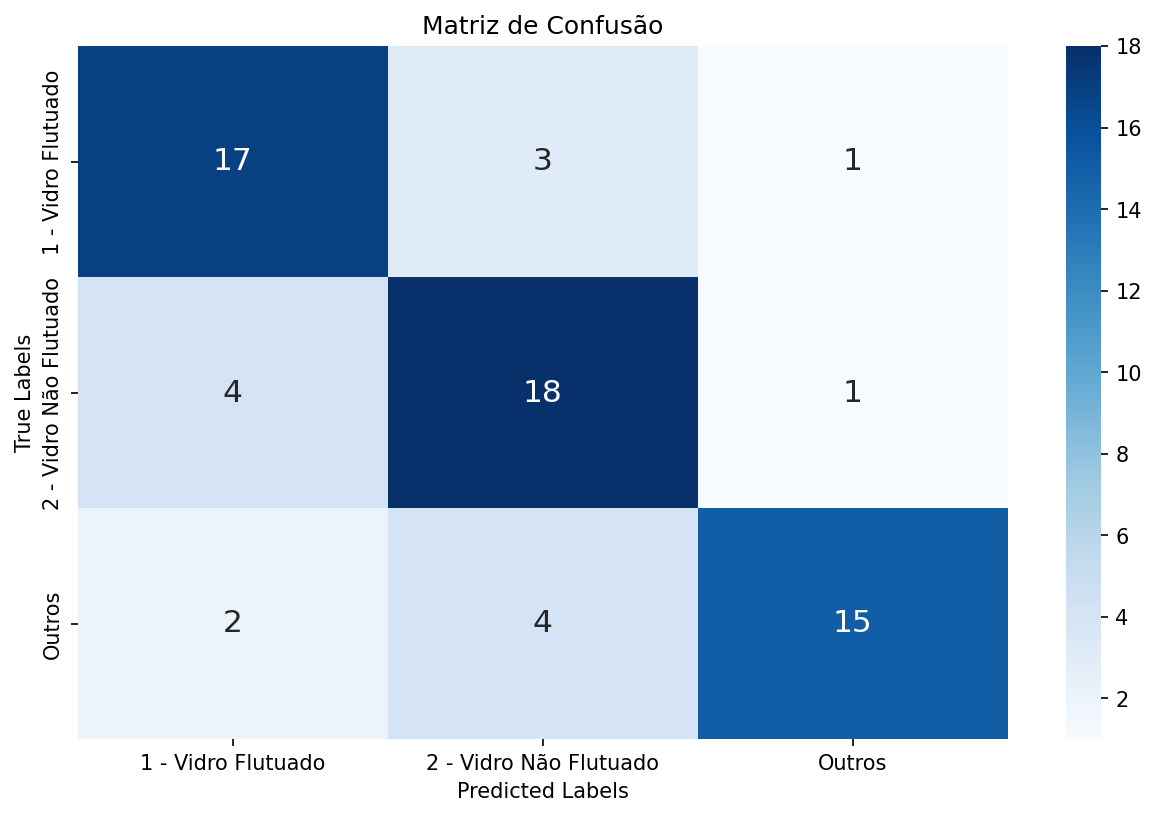

In [ ]:
#### Modelo POLY

In [ ]:
#Análise Adicional -> Se quiser ajustar hiperparâmetros automaticamente
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'class_weight': ['balanced',]
}

# Configurar o GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Best Parameters:", grid.best_params_)

# Avaliar no conjunto de teste
grid_predictions = grid.best_estimator_.predict(X_test)
print("Classification Report:\n", classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=

<p style='text-align: justify;'>
Os resultados obtidos após a aplicação das diferentes hipóteses e ajustes de parâmetros demonstraram variações significativas nas métricas de desempenho.
</p>

# **Conclusão**

<p style='text-align: justify;'>
O estudo confirmou a eficácia de abordagens
</p>
